In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import nltk
import re
import string

In [3]:
hfi = pd.read_csv('hfi_cc_2018.csv')
hfi.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [4]:
print(hfi.columns)

Index([u'year', u'ISO_code', u'countries', u'region', u'pf_rol_procedural',
       u'pf_rol_civil', u'pf_rol_criminal', u'pf_rol', u'pf_ss_homicide',
       u'pf_ss_disappearances_disap',
       ...
       u'ef_regulation_business_bribes', u'ef_regulation_business_licensing',
       u'ef_regulation_business_compliance', u'ef_regulation_business',
       u'ef_regulation', u'ef_score', u'ef_rank', u'hf_score', u'hf_rank',
       u'hf_quartile'],
      dtype='object', length=123)


In [5]:
print(hfi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB
None


In [6]:
hfi.describe()

,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


In [8]:
hfi[hfi['countries'] == 'Russia'].mean()

year                                  2012.000000
pf_rol_procedural                        3.770599
pf_rol_civil                             4.948302
pf_rol_criminal                          3.696139
pf_rol                                   4.147344
pf_ss_homicide                           4.977812
pf_ss_disappearances_disap               0.555556
pf_ss_disappearances_violent             9.214397
pf_ss_disappearances_organized           5.000000
pf_ss_disappearances_fatalities          9.719299
pf_ss_disappearances_injuries            9.657984
pf_ss_disappearances                     6.829447
pf_ss_women_fgm                         10.000000
pf_ss_women_missing                     10.000000
pf_ss_women_inheritance_widows          10.000000
pf_ss_women_inheritance_daughters       10.000000
pf_ss_women_inheritance                 10.000000
pf_ss_women                             10.000000
pf_ss                                    7.269086
pf_movement_domestic                     4.444444


In [9]:
np.nanpercentile(hfi['hf_score'], 50)

6.923840432999999

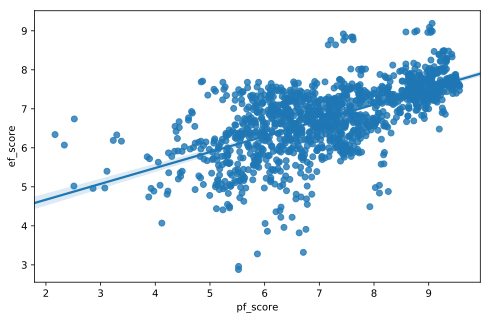

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
sns.regplot(x='pf_score', y='ef_score', data=hfi)

[Text(0,0,'Albania'),
 Text(0,0,'Algeria'),
 Text(0,0,'Angola'),
 Text(0,0,'Argentina'),
 Text(0,0,'Armenia'),
 Text(0,0,'Australia'),
 Text(0,0,'Austria'),
 Text(0,0,'Azerbaijan'),
 Text(0,0,'Bahamas'),
 Text(0,0,'Bahrain'),
 Text(0,0,'Bangladesh'),
 Text(0,0,'Barbados'),
 Text(0,0,'Belarus'),
 Text(0,0,'Belgium'),
 Text(0,0,'Belize'),
 Text(0,0,'Benin'),
 Text(0,0,'Bhutan'),
 Text(0,0,'Bolivia'),
 Text(0,0,'Bosnia and Herzegovina'),
 Text(0,0,'Botswana'),
 Text(0,0,'Brazil'),
 Text(0,0,'Brunei Darussalam'),
 Text(0,0,'Bulgaria'),
 Text(0,0,'Burkina Faso'),
 Text(0,0,'Burundi'),
 Text(0,0,'Cambodia'),
 Text(0,0,'Cameroon'),
 Text(0,0,'Canada'),
 Text(0,0,'Cape Verde'),
 Text(0,0,'Central Afr. Rep.'),
 Text(0,0,'Chad'),
 Text(0,0,'Chile'),
 Text(0,0,'China'),
 Text(0,0,'Colombia'),
 Text(0,0,'Congo, Dem. R.'),
 Text(0,0,'Congo, Rep. Of'),
 Text(0,0,'Costa Rica'),
 Text(0,0,"Cote d'Ivoire"),
 Text(0,0,'Croatia'),
 Text(0,0,'Cyprus'),
 Text(0,0,'Czech Rep.'),
 Text(0,0,'Denmark'),
 Text(

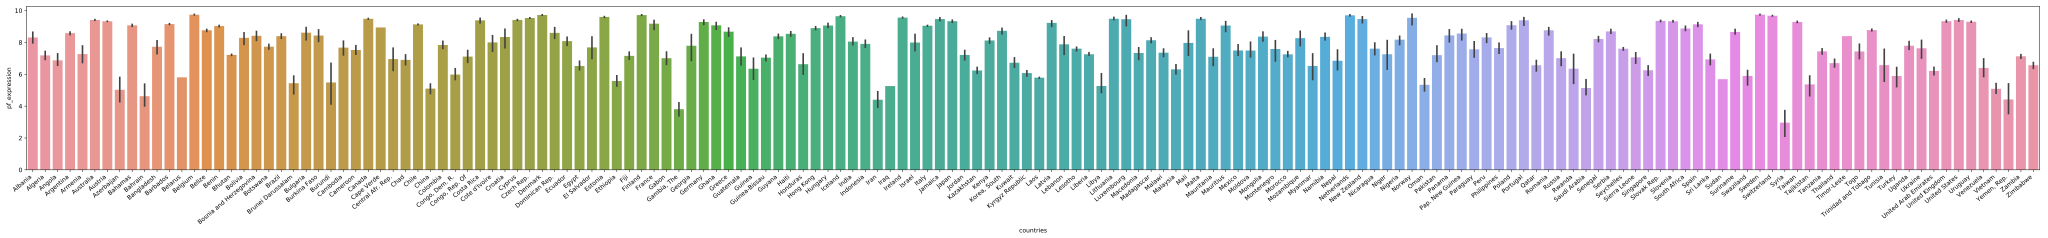

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 60, 5
ax = sns.barplot(data = hfi, x = 'countries', y = 'pf_expression')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")